
# Problems

In [4]:
 # Dates & Times. https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fian%5Fmcloughlin%5Fatu%5Fie%2FDocuments%2Fstudent%5Fshares%2Fcomputer%2Dinfrastructure%2F22%2Ddatetime%2Emkv&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2Eca70c99c%2D5d51%2D4c6a%2D8743%2D670d34da45a7
import datetime as dt

 # Data frames
import pandas as pd

# Yahoo finance data.
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt

# Folder creation + listing files
import os


## Problem 1: Data from yfinance

Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:
Facebook (META)  
Apple (AAPL)  
Amazon (AMZN)  
Netflix (NFLX)  
Google (GOOG)  

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

https://github.com/ranaroussi/yfinance


In [5]:
# https://ranaroussi.github.io/yfinance/
#tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

sTEP 1:
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

In [6]:
 # Set up the function 'get_data()' that can be called for hourly prices of FAANG stocks over the last 5 days
def get_data(): 
    df = yf.download("META AAPL AMZN NFLX GOOG", period="5d")
    return df

# References:
# Python functions - https://www.w3schools.com/python/python_functions.asp
# Yfinance Download -  https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

 # Call the function
df = get_data()

/tmp/ipykernel_2734/1000238927.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("META AAPL AMZN NFLX GOOG", period="5d")
[*********************100%***********************]  5 of 5 completed


In [7]:
# can remove
type(df)

pandas.core.frame.DataFrame

In [8]:
# can remove
df.head

<bound method NDFrame.head of Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NFLX   
Date                                                                     
2025-11-21  271.489990  220.690002  299.649994  594.250000  104.309998   
2025-11-24  275.920013  226.279999  318.470001  613.049988  106.970001   
2025-11-25  276.970001  229.669998  323.640015  636.219971  104.400002   
2025-11-26  277.549988  229.160004  320.279999  633.609985  106.139999   
2025-11-28  278.850006  233.220001  320.119995  647.950012  107.580002   

Price             High                                                  ...  \
Ticker            AAPL        AMZN        GOOG        META        NFLX  ...   
Date                                                                    ...   
2025-11-21  273.329987  222.210007  303.959991  598.119995  106.529999  ...   
2025-11-24  277.000000  227.330002  319.799988  616.700012  1

step 3 :
save the file down in CSV format using the naming convention
format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds.



In [9]:

# https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fian%5Fmcloughlin%5Fatu%5Fie%2FDocuments%2Fstudent%5Fshares%2Fcomputer%2Dinfrastructure%2F21%2Dsaving%2Ddata%2Emkv&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2E4010ac0b%2D5f2f%2D49bd%2Da4c3%2Daff9bc770d09



# Show current date & time                                        #Ref. - https://docs.python.org/3/library/datetime.html
now = dt.datetime.now()

#Show date & time
now

#Format date & time for current date & time above as a string -  'now' 
now.strftime("%Y%m%d-%H:%M:%S")             # Ref. format codes - https://docs.python.org/3/library/datetime.html#format-codes

'20251129-14:00:37'

In [10]:
# Create folder called 'Data'                  https://www.geeksforgeeks.org/python/python-os-makedirs-method/
os.makedirs('./Data', exist_ok=True)           # exist_ok=True - means when code re-ran no handling error will appear as folder exists - add as markdown cell


# File Name - Save to data folder # cOMMENT oCT 19TH - nEED TO ADD LOCATION OF folder where file will save
filename = "Data/" + now.strftime("%Y%m%d-%H:%M:%S")+ ".csv"



In [11]:
# Save timestamped csv to Data folder
df.to_csv(filename)




## Problem 2: Plotting Data

Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html



In [12]:
#Call plot

#df.plot()
# Check columns so we can see what we are working with & columns required
df.columns




MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

<Axes: xlabel='Date'>

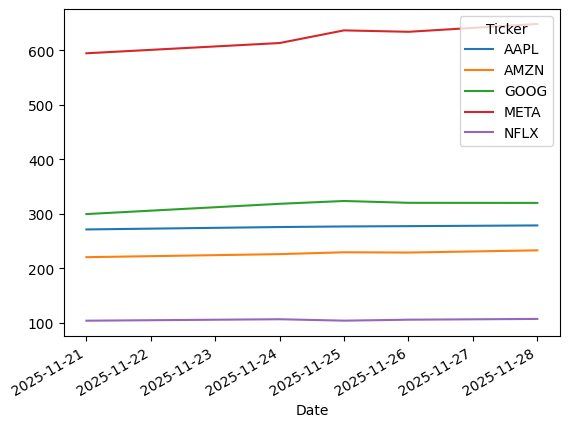

In [13]:
#Closing prices for 5 stocks - put as variable so can easily amend single line if future stocks added
closing_Prices = df['Close']

# Plot the closing prices
closing_Prices.plot()





# Save plot to file (Lecture 29-30) Lecture 31 to follow - matching csv file to plot

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html


Markdown comments expand on
doc for savefig , explain how it is used
Explain each line itesm of code in markdown cell in more info



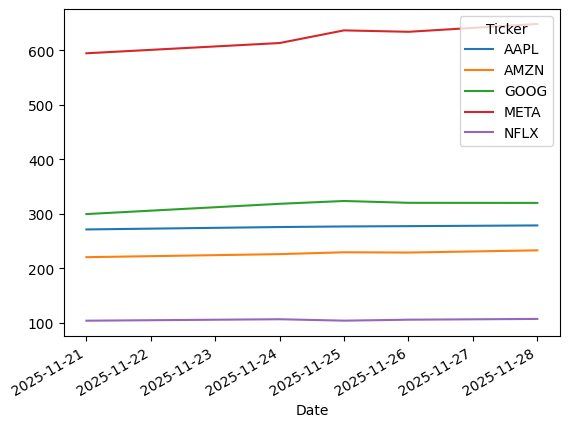

In [14]:
# Save plot to file (Lecture 29-31)

#Creat new figure and axis
fig, ax = plt.subplots()

# Plot closing prices
closing_Prices.plot(ax=ax)

# Show current date & time                                        #Ref. - https://docs.python.org/3/library/datetime.html
now = dt.datetime.now()

# File Name
filename = "./Plots/" + now.strftime("%Y%m%d-%H:%M:%S")+ ".png"

# Create folder called 'Plots'                  https://www.geeksforgeeks.org/python/python-os-makedirs-method/
os.makedirs('./Plots', exist_ok=True)           # exist_ok=True - means when code re-ran no handling error will appear as folder exists - add as markdown cell

# Save figure in Plots folder
fig.savefig(filename, dpi=300)    # dpi ref = https://stackoverflow.com/questions/39870642/how-to-plot-a-high-resolution-graph

File Listings - Lecture 31

https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
https://docs.python.org/3/library/os.html#os.listdir

In [15]:
# List the files in the Data Folder
data_files = os.listdir('./Data/')

#Show
data_files




['20251122-14:30:06.csv',
 '20251122-14:29:45.csv',
 '20251129-11:17:53.csv',
 '20251122-14:29:20.csv',
 '20251129-14:00:37.csv',
 '20251122-13:25:33.csv']

In [16]:
# Sort the list of data files           # https://docs.python.org/3/howto/sorting.html
data_files.sort(reverse=True)

#Show
#data_files

#Latest file
data_files[0]


'20251129-14:00:37.csv'

## Problem 3: Script

Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook

Added a shebang line
#! /usr/bin/env python  

so that we could run the python code without stating python prior to running  **NOTE 15th Nov: Add comparison table of before and after this step**
faang.py was not exucatable so we used chmod u+x faang.py to allow the file to be executed, previously was read only access
ls -l to check if file execuatbele or just rw
be creful that we instruct on command line to look to current folder as does not auto pick up ./faang.py as an example

In [34]:
# lecture 33 - delete - messing
df = pd.read_csv(f'Data/{data_files[0]}',header=[0,1],skiprows=[2])

df

# mULTICOLUMN INDEX back from yfinance, currently only using 1st row
# Remove multi index - ref. https://stackoverflow.com/questions/20208320/how-to-remove-multiindex-in-pandas-dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

# header infer means firs

Price       Close                                                  \
       Ticker        AAPL        AMZN        GOOG        META        NFLX   
0  2025-11-21  271.489990  220.690002  299.649994  594.250000  104.309998   
1  2025-11-24  275.920013  226.279999  318.470001  613.049988  106.970001   
2  2025-11-25  276.970001  229.669998  323.640015  636.219971  104.400002   
3  2025-11-26  277.549988  229.160004  320.279999  633.609985  106.139999   
4  2025-11-28  278.850006  233.220001  320.119995  647.950012  107.580002   

         High                                      ...        Open  \
         AAPL        AMZN        GOOG        META  ...        AAPL   
0  273.329987  222.210007  303.959991  598.119995  ...  265.950012   
1  277.000000  227.330002  319.799988  616.700012  ...  270.899994   
2  280.380005  230.520004  328.670013  637.049988  ...  275.269989   
3  279.529999  231.750000  324.989990  638.359985  ...  276.959991   
4  279.000000  233.289993  326.880005  648.049988  ...  277.260010   

                                                     Volume            \
         AMZN        GOOG        META        NFLX      AAPL      AMZN   
0  216.350006  296.869995  588.500000  105.129997  59030800  68490500   
1  222.559998  311.010010  598.719971  104.250000  65585800  54318400   
2  226.380005  326.799988  624.000000  106.120003  46914200  39379300   
3  230.740005  320.779999  637.690002  105.739998  33431400  38497900   
4  231.240005  323.429993  636.080017  106.440002  20135600  20292300   

                                 
       GOOG      META      NFLX  
0  43670600  21052600  41232700  
1  55311800  23554900  62918300  
2  50899300  25213000  35122600  
3  29839600  15209500  27951000  
4  19695800  11033200  15021600  

[5 rows x 26 columns]

## Problem 4: Automation

Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

Lecture 34 - 

To automate the execution of the script, we need to set up GitHub Actions by creating:

1. A directory named .github/workflows/  
2. A workflow file inside the directory called faang.yml

Background Information:

**GitHub Actions** is a CI/CD (Continuous Integration and Continuous Delivery) system that lets you automate tasks such as building, testing, and running scripts. Workflows run automatically in response to events—like pushing code to the repository—or on a defined schedule, for example,  as in this case running the FAANG code every Saturday morning.  
**Reference**: GitHub Actions Docs – https://docs.github.com/en/actions

More information can be found in the GitHub Actions quickstart guide:
https://docs.github.com/en/actions/get-started/quickstart

**YML or YAML** -  YAML stands for YAML Ain't Markup Language, but it originally stood for Yet Another Markup Language - is human readable data serialization language that is similar to JSON and XML files.Serialization is a process where one application or service that has different data structures and is written in a different set of technologies can transfer data to another application using a standard format.
Serialization is about translating, converting, and wrapping up a data structure in another format.
The data in the new format can be stored in a file or transmitted to another application or service over a network.
YAML is a widely used format for writing configuration files for different DevOps tools, programs, and applications because of its human-readable and intuitive syntax.  
**Reference**: Freecodecamp - what is YAML – https://www.freecodecamp.org/news/what-is-yaml-the-yml-file-format/


Steps:



Once the workflow file is created, we add the required YAML configuration code into faang.yml.




 ## End